In [8]:
import numpy as np
file = open("car_evaluation.csv", "r")
lines = file.readlines()
numified_data = []
numified_target = []

data_types = {}
x = 0
for line in lines:
    line = line.replace("\n", "")
    data = []
    for splitted in line.split(",")[:-1]:
        if splitted not in data_types:
            data_types[splitted] = x
            x = x + 1
        data.append(data_types[splitted])
    numified_data.append(data)
    numified_target.append(0 if line.split(",")[-1] == 'unacc' else 1)

numified_data = np.array(numified_data)
numified_target = np.array(numified_target)
print(data_types)
print(numified_data[:10])
print(numified_target[:10])

{'vhigh': 0, '2': 1, 'small': 2, 'low': 3, 'med': 4, 'high': 5, 'big': 6, '4': 7, 'more': 8, '3': 9, '5more': 10}
[[0 0 1 1 2 3]
 [0 0 1 1 2 4]
 [0 0 1 1 2 5]
 [0 0 1 1 4 3]
 [0 0 1 1 4 4]
 [0 0 1 1 4 5]
 [0 0 1 1 6 3]
 [0 0 1 1 6 4]
 [0 0 1 1 6 5]
 [0 0 1 7 2 3]]
[0 0 0 0 0 0 0 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numified_data)
# print(scaler.mean_)
# print(scaler.scale_)
# print(scaler.var_)
print(X_scaled)
print(dir(scaler))

[[-1.60356745 -1.60356745 -1.64706421 -1.40182605 -1.22474487 -1.22474487]
 [-1.60356745 -1.60356745 -1.64706421 -1.40182605 -1.22474487  0.        ]
 [-1.60356745 -1.60356745 -1.64706421 -1.40182605 -1.22474487  1.22474487]
 ...
 [ 0.          0.          0.93094934  0.86266219  1.22474487 -1.22474487]
 [ 0.          0.          0.93094934  0.86266219  1.22474487  0.        ]
 [ 0.          0.          0.93094934  0.86266219  1.22474487  1.22474487]]
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_li

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.16666667 0.16666667]


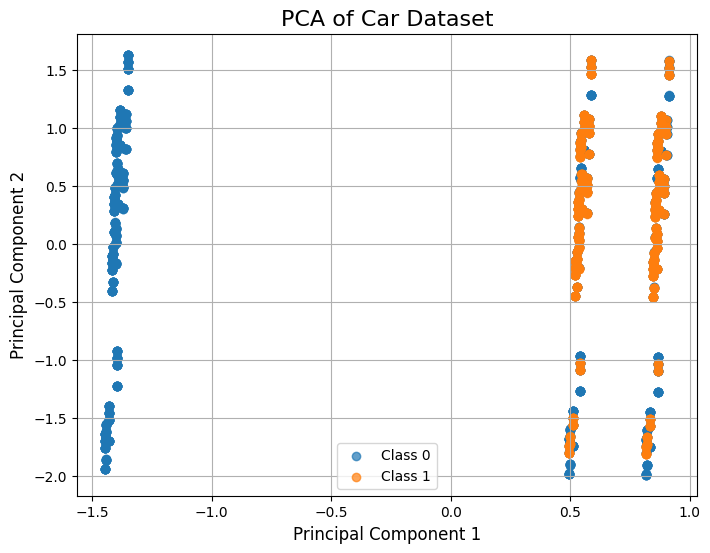

In [12]:
import matplotlib.pyplot as plt
# Scatter plot of PCA-transformed data
plt.figure(figsize=(8, 6))
for target in set(numified_target):
    plt.scatter(
        X_pca[numified_target == target, 0],
        X_pca[numified_target == target, 1],
        label=f"Class {target}",
        alpha=0.7
    )
plt.title("PCA of Car Dataset", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Before pca data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(numified_data, numified_target, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [10, 20, 30],
    "max_depth": [None, 5, 7, 9],
    "min_samples_leaf": [5, 7, 9, 11]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

pca_best_params = grid_search.best_params_
pca_best_accuracy = grid_search.best_score_
print("Best Parameters:", pca_best_params)
print("Best Training Accuracy:", pca_best_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 30}
Best Training Accuracy: 0.9746846001459701


In [18]:
# Using pca data
X_train, X_test, y_train, y_test = train_test_split(X_pca, numified_target, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [10, 20, 30],
    "max_depth": [None, 5, 7, 9],
    "min_samples_leaf": [5, 7, 9, 11]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Training Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 7, 'n_estimators': 20}
Best Training Accuracy: 0.7489156500886247


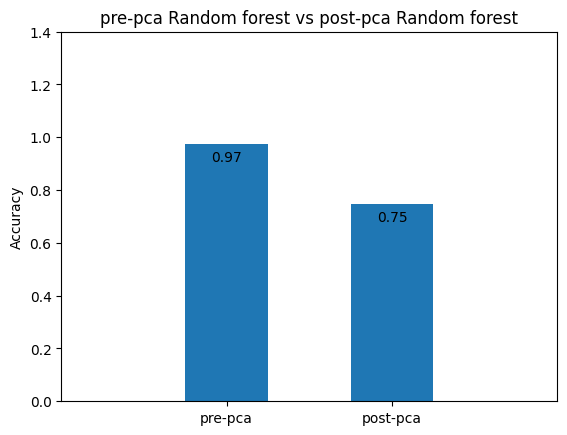

In [50]:
plt.figure()
plt.title("pre-pca Random forest vs post-pca Random forest")
barChart = plt.bar([0, 1], [pca_best_accuracy, best_accuracy], width=0.5)
plt.bar_label(barChart, fmt='%.2f', padding=-15)
plt.xticks([0, 1], labels=["pre-pca", "post-pca"])
plt.ylabel("Accuracy")
plt.axis([-1, 2, 0, 1.4])
plt.show()